# Example of working with GHCN data from Romania

[Global historcal climate network](http://www.ncdc.noaa.gov/ghcnm/) weather station data from Romania.

Requires Pandas version > 0.19.0

In [1]:
# Load some libraries
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tqdm import *

matplotlib.style.use('ggplot')
%matplotlib inline

## Step 1: data preperation

From our Station Data files we need to create:
* one single data structure
* Date indexed data (with only one index for all the datasets)
* Station names as column identifiers

We will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable/index.html), as it is perfectly suited to our task. We have read it in above with the alias **pd**.

Before we try and read all the data, let's test a procedure with one single station file.

In [2]:
# Read a station data file with Pandas
test_data = pd.read_csv("Data/station_data/BUM00015502_VIDIN_BU_.csv")
test_data.head()

,DATE,PRCP,TAVG
0,19860301,-9999.0,-5.7
1,19860303,-9999.0,-0.1
2,19860304,0.5,0.9
3,19911129,-9999.0,5.3
4,19911201,-9999.0,5.1


Looks good, but the Dates should be an index, not a column, and they should also be a date object, not a simple integer (we get much more functionality that way).

In [3]:
# Make a list of datetime values out of the integer dates using a list comprehension technique
dates = []
for date in test_data['DATE']:
    dates.append(pd.datetime.strptime(str(date),"%Y%m%d"))
# The above could have been done more effectivley using list comprehension

# Next set the new list as an index, and remove the old column from the dataset
test_data.index = dates
test_data = test_data.drop(['DATE','PRCP'], axis=1)

test_data.head()

,TAVG
1986-03-01,-5.7
1986-03-03,-0.1
1986-03-04,0.9
1991-11-29,5.3
1991-12-01,5.1


Great! We can plot a simple preview of the data to make sure it looks good.

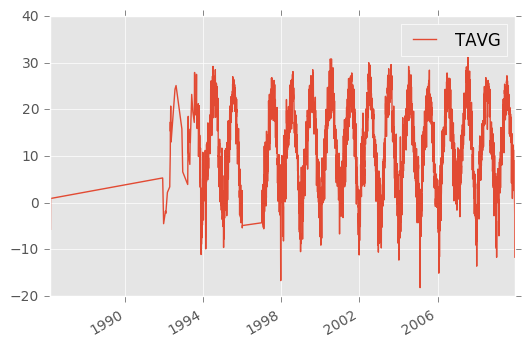

In [4]:
test_data.plot()

The preview plot is messy as our data are not contiguous, but as a quick-check, it seems like everything is more-or-less fine.

So, reading a single file is easy, and straightforward. But we want to do some exploratory analysis on multiple station measurements. For this we will need to read all the station data together into a consistent data object. 

In [5]:
# Make a small tools (functions) to help with the work

def station_name(fname):
    """Return the station ID from a path/filename.csv string"""
    tmp = fname.split('/')[-1]
    return tmp.split('_')[0]

In [ ]:
# If we were on a Mac or Linux system, we could get the file list via a bash command
flist = !ls Data/station_data/*.csv

In [6]:
# But this will break on windows. To make our code cross-platform we use a python
# library to find all the files instead. This is much better than hard-coding the files!

frames = [] # an empty list to hold each data object as it is loaded

mypath = 'Data/station_data/'          # Set path to data
for item in tqdm(os.listdir(mypath)):        # Find all files in that path and loop over them
    if '.csv' in item:                 # If the file is a csv type do something...
        fname = ''.join([mypath,item])
        station = station_name(fname)
        #print('\rReading data from station', station, end='')
        tmp = pd.read_csv(fname)
        dates = [pd.datetime.strptime(str(date),"%Y%m%d") for date in tmp['DATE']]
        tmp.index = dates
        tmp = tmp.drop(['DATE','PRCP'], axis=1) # get rid of date and precipitation columns
        tmp.columns = [station]     # Re-name TAVG to be the station name
        frames.append(tmp)
#print('\rDone reading data.')
print("{0} GHCN files read".format(len(frames)))

100%|██████████| 39/39 [00:05<00:00,  8.69it/s]

36 GHCN files read


In [7]:
df = pd.concat(frames)  # Join all the seperate data together into one object

## Step 2: Cleaning the dataset for analysis

Now we have created a dataframe **df** holding all the station data with one coherant time index.

This abstraction will do much of the work for us...

In [8]:
# First lets see how long these data run for in time
print("minimum date:", min(df.index).date())
print("maximum date:", max(df.index).date())

minimum date: 1980-01-01
maximum date: 2009-12-31


In [9]:
# Now let's look at a statistical description of these data
df.describe()

,BUM00015502,MD000033881,MD000033885,ROE00100829,ROE00100898,ROE00100899,ROE00100900,ROE00100901,ROE00100902,ROE00100903,...,ROE00108901,ROE00108903,ROM00015023,ROM00015085,ROM00015247,ROM00015280,ROM00015360,UPM00033657,UPM00033889,UPM00033898
count,5559.000000,5018.000000,3288.0,10958.0,7671.0,7671.0,10958.000000,10958.0,10958.000000,10958.0,...,10958.000000,10958.0,9740.000000,9283.000000,10931.000000,10958.000000,10958.000000,7143.000000,10528.000000,2999.000000
mean,11.848138,-6941.615843,-9999.0,-9999.0,-9999.0,-9999.0,-13.355986,-9999.0,-8.494789,-9999.0,...,-21.195099,-9999.0,8.089189,-1368.377744,11.087110,-55.171254,-127.964948,-4237.818102,9.883169,11.217172
std,9.214671,4610.243549,0.0,0.0,0.0,0.0,496.394257,0.0,416.482596,0.0,...,548.479493,0.0,9.260360,3447.104713,8.938544,725.432256,1174.701061,4943.788568,97.994676,9.070838
min,-18.200000,-9999.000000,-9999.0,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.000000,-9999.0,-24.700000,-9999.000000,-17.700000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-19.900000
25%,4.400000,-9999.000000,-9999.0,-9999.0,-9999.0,-9999.0,3.200000,-9999.0,1.600000,-9999.0,...,1.700000,-9999.0,0.800000,-2.300000,3.800000,-7.400000,4.200000,-9999.000000,3.200000,4.250000
50%,12.400000,-9999.000000,-9999.0,-9999.0,-9999.0,-9999.0,12.000000,-9999.0,9.900000,-9999.0,...,10.000000,-9999.0,8.700000,6.300000,11.800000,-1.900000,11.800000,-6.300000,11.300000,11.100000
75%,19.900000,-0.600000,-9999.0,-9999.0,-9999.0,-9999.0,19.500000,-9999.0,16.400000,-9999.0,...,16.400000,-9999.0,15.800000,14.900000,18.600000,3.600000,19.500000,6.300000,18.900000,18.900000
max,31.200000,31.400000,-9999.0,-9999.0,-9999.0,-9999.0,32.100000,-9999.0,28.300000,-9999.0,...,30.000000,-9999.0,29.100000,29.900000,31.900000,16.700000,28.900000,27.900000,32.000000,62.200000


There is a clear problem with these stats. Most of these data seem to have a missing value of `-9999.0` included.
To proceede we should replace with with a missing data type that we can operate with `np.nan`

In [10]:
# we can replace all -999.0 values with np.nan like this
df[df == -9999.0] = np.nan

In [11]:
# Now, the dataframe values seems reasonable, except we can see there are many series which are empty.
# They were just full of missing values for whatever reason.

df.describe()

,BUM00015502,MD000033881,MD000033885,ROE00100829,ROE00100898,ROE00100899,ROE00100900,ROE00100901,ROE00100902,ROE00100903,...,ROE00108901,ROE00108903,ROM00015023,ROM00015085,ROM00015247,ROM00015280,ROM00015360,UPM00033657,UPM00033889,UPM00033898
count,5559.000000,1533.000000,0.0,0.0,0.0,0.0,10931.000000,0.0,10939.000000,0.0,...,10925.000000,0.0,9740.000000,8006.000000,10931.000000,10900.000000,10805.000000,4114.000000,10527.000000,2999.000000
mean,11.848138,8.797586,NaN,NaN,NaN,NaN,11.308947,NaN,8.857766,NaN,...,8.943808,NaN,8.089189,8.252860,11.087110,-2.259138,11.810005,3.946597,10.833951,11.217172
std,9.214671,9.237687,NaN,NaN,NaN,NaN,9.473929,NaN,9.015601,NaN,...,9.078585,NaN,9.260360,9.146393,8.938544,7.430264,8.616334,8.912032,9.262486,9.070838
min,-18.200000,-16.500000,NaN,NaN,NaN,NaN,-16.300000,NaN,-21.800000,NaN,...,-24.400000,NaN,-24.700000,-23.700000,-17.700000,-31.400000,-17.800000,-32.400000,-34.400000,-19.900000
25%,4.400000,1.100000,NaN,NaN,NaN,NaN,3.200000,NaN,1.600000,NaN,...,1.800000,NaN,0.800000,1.200000,3.800000,-7.300000,4.500000,-2.300000,3.200000,4.250000
50%,12.400000,8.900000,NaN,NaN,NaN,NaN,12.100000,NaN,9.900000,NaN,...,10.000000,NaN,8.700000,9.200000,11.800000,-1.900000,12.100000,4.200000,11.300000,11.100000
75%,19.900000,16.500000,NaN,NaN,NaN,NaN,19.500000,NaN,16.400000,NaN,...,16.400000,NaN,15.800000,15.800000,18.600000,3.625000,19.600000,11.100000,18.900000,18.900000
max,31.200000,31.400000,NaN,NaN,NaN,NaN,32.100000,NaN,28.300000,NaN,...,30.000000,NaN,29.100000,29.900000,31.900000,16.700000,28.900000,27.900000,32.000000,62.200000


In [12]:
# It looks like we can simply filter out data that now has a low count (e.g. < 10,000).

limit = 10000

for key in df:
    if df[key].count() <= limit:
        print('removing', key,'from df object.')
        df = df.drop([key], axis=1)

removing BUM00015502 from df object.
removing MD000033881 from df object.
removing MD000033885 from df object.
removing ROE00100829 from df object.
removing ROE00100898 from df object.
removing ROE00100899 from df object.
removing ROE00100901 from df object.
removing ROE00100903 from df object.
removing ROE00100904 from df object.
removing ROE00100905 from df object.
removing ROE00108887 from df object.
removing ROE00108888 from df object.
removing ROE00108891 from df object.
removing ROE00108894 from df object.
removing ROE00108897 from df object.
removing ROE00108898 from df object.
removing ROE00108899 from df object.
removing ROE00108900 from df object.
removing ROE00108903 from df object.
removing ROM00015023 from df object.
removing ROM00015085 from df object.
removing UPM00033657 from df object.
removing UPM00033898 from df object.


In [13]:
# Much better! Finally a clean df object, that we can work from.

df.describe()

,ROE00100900,ROE00100902,ROE00108889,ROE00108890,ROE00108892,ROE00108893,ROE00108895,ROE00108896,ROE00108901,ROM00015247,ROM00015280,ROM00015360,UPM00033889
count,10931.000000,10939.000000,10956.000000,10932.000000,10572.000000,10570.000000,10939.000000,10927.000000,10925.000000,10931.000000,10900.000000,10805.000000,10527.000000
mean,11.308947,8.857766,11.184292,10.697539,12.089397,11.349016,11.045617,9.988835,8.943808,11.087110,-2.259138,11.810005,10.833951
std,9.473929,9.015601,9.448243,8.646676,8.600185,9.500535,9.614037,9.674381,9.078585,8.938544,7.430264,8.616334,9.262486
min,-16.300000,-21.800000,-17.300000,-14.800000,-15.600000,-17.700000,-19.000000,-23.600000,-24.400000,-17.700000,-31.400000,-17.800000,-34.400000
25%,3.200000,1.600000,3.100000,3.700000,5.100000,3.400000,2.900000,2.100000,1.800000,3.800000,-7.300000,4.500000,3.200000
50%,12.100000,9.900000,11.800000,11.500000,12.400000,12.200000,11.900000,10.800000,10.000000,11.800000,-1.900000,12.100000,11.300000
75%,19.500000,16.400000,19.400000,17.800000,19.700000,19.400000,19.300000,18.200000,16.400000,18.600000,3.625000,19.600000,18.900000
max,32.100000,28.300000,32.400000,31.900000,31.000000,33.100000,33.100000,31.600000,30.000000,31.900000,16.700000,28.900000,32.000000


## Step 3. Analysis


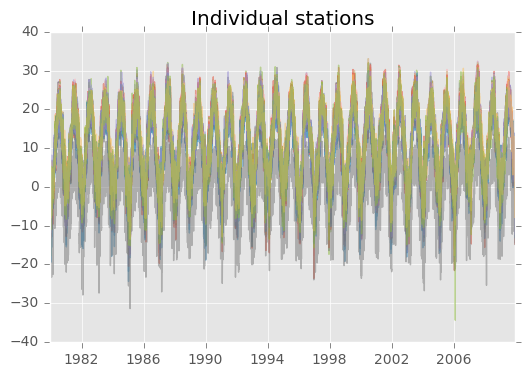

In [15]:
for key in df:
    plt.plot(df[key], lw=1., alpha=0.5)
plt.title('Individual stations')
plt.show()

Aggregated, these data gives a clearer picture

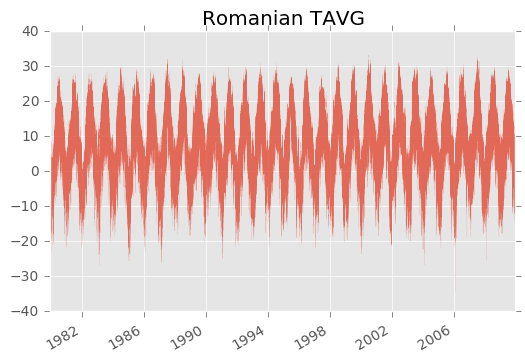

In [18]:
df.mean(axis=1).plot(title='Romanian TAVG', lw=0.1, alpha=0.8)

Looking at the data it is easy to see the seasonal signal is dominant. One method of removing the seasonal signal and work with anomalies is to subtract a day-of-the-year (DOY) mean.

In [19]:
# make the average data a new series, and strip out nan values for working ease
df_mean = pd.DataFrame(df.mean(axis=1), columns=['mean_temp'])  # make a new df object
df_mean = df_mean[df_mean.notnull().values]                     # remove missing values

I can look at every day in the time series, find its DOY value (an integer from 1 - 366), make a corresponding list, and use it to subscript the mean dataframe, and find the mean on each day of the year. I place these values in a dictionary with integer doy as a key, for ease of use later when deseasonalising.  

In [70]:
doy_index = np.array([ date.dayofyear for date in df_mean.index])  # make an array of DOY values to use as a lookup
d = {}
for doy in range(1,367):
    d[doy] = df_mean[doy_index == doy].mean().values[0]

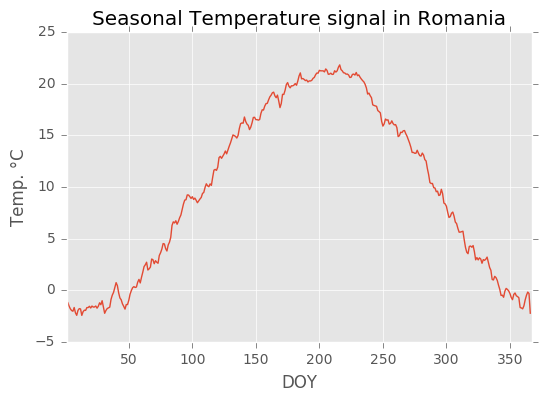

In [85]:
# Veryify it looks okay...
tmp = []
for key in d:
    tmp.append(d[key])
plt.plot(range(1,367), tmp)
plt.title("Seasonal Temperature signal in Romania")
plt.xlabel('DOY')
plt.xlim([1,367])
plt.ylabel("Temp. °C")
plt.show()

In [ ]:
#df_mean


# Day of year mean...

# Deseasnalise data with DOY mean

# Examine average temperature anomalies

## Step 4: Using the data for something useful!

Based on historical Romanian average temperature anomalies, how does a given value rank?

Requires an average temperature and a date as input.

In [ ]:
#df.mean(axis=1).plot.hist(bins=150, normed=True, xlim=[-30,40])

In [ ]:
# Extract a ranked list of the valid values

tmp = df.mean(axis=1, skipna=True)
tmp = tmp[tmp.notnull()]
ranked = np.array(sorted(tmp.values))

plt.plot(ranked)

In [ ]:
a,b,c = plt.hist(ranked, bins=150, cumulative=True, normed=True)

In [ ]:
# Needs to be anomalies
x = 30
pop = len(ranked)
print("{0} values in population".format(pop))
mask = x < ranked
larger = len(ranked[mask])
print("{0} values are greater than {1}C".format(larger, x))